In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv('DATASET/spam.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# 1.Data Cleaning

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [72]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
332,spam,Call Germany for only 1 pence per minute! Call...
1567,ham,"whatever, im pretty pissed off."
5025,spam,Ur cash-balance is currently 500 pounds - to m...
3422,spam,Had your mobile 10 mths? Update to latest Oran...
2074,ham,Yar lor actually we quite fast... Cos da ge sl...


In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [89]:
df['target']=encoder.fit_transform(df['target'])
df.sample(5)

,target,text,num_char,num_words,num_sent
685,0,Have you finished work yet? :),30,8,2
4573,0,:( but your not here....,24,7,1
667,0,This pay is &lt;DECIMAL&gt; lakhs:),37,13,1
5207,0,"Babe, I'm answering you, can't you see me ? Ma...",109,29,4
601,0,If u sending her home first it's ok lor. I'm n...,59,17,2


In [76]:
df.isna().sum()

target    0
text      0
dtype: int64

In [77]:
df.duplicated().sum()

403

In [78]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

In [79]:
df.shape

(5169, 2)

# 2.Exploratory Data Analysis

In [80]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x24fa4ad2110>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

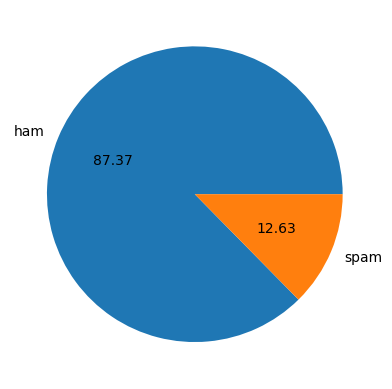

In [81]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [82]:
import nltk
%pip install nltk
nltk.download('punkt')

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LEGION\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [83]:

df['num_char'] = df['text'].apply(len)
df.sample(5)

,target,text,num_char
4162,0,I told that am coming on wednesday.,35
3974,0,do u think that any girl will propose u today ...,132
1138,0,What * u wearing?,17
589,0,"I'm in a meeting, call me later at",34
4499,0,Nvm take ur time.,17


In [84]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [85]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [86]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [90]:
df[df['target'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [91]:
df[df['target'] == 1][['num_char','num_words','num_sent']].describe()


,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [92]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

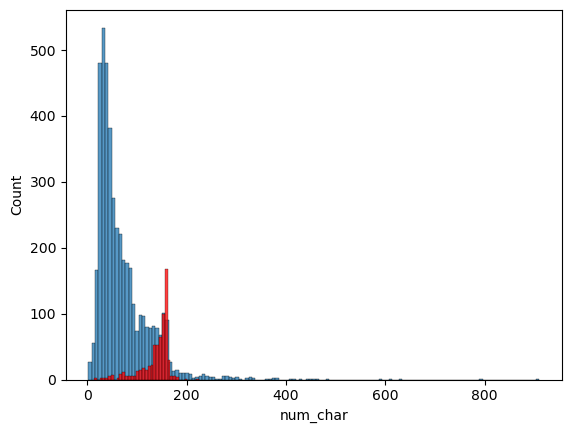

In [94]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

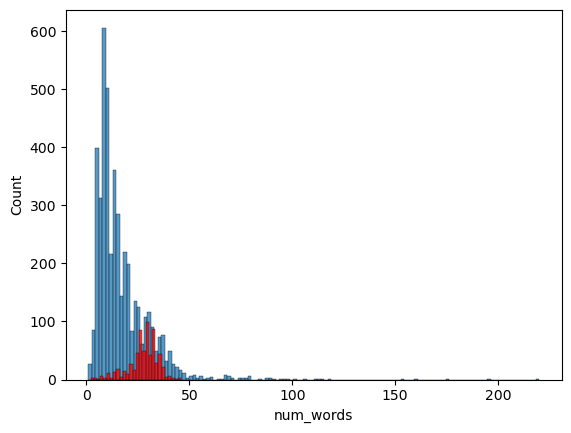

In [95]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

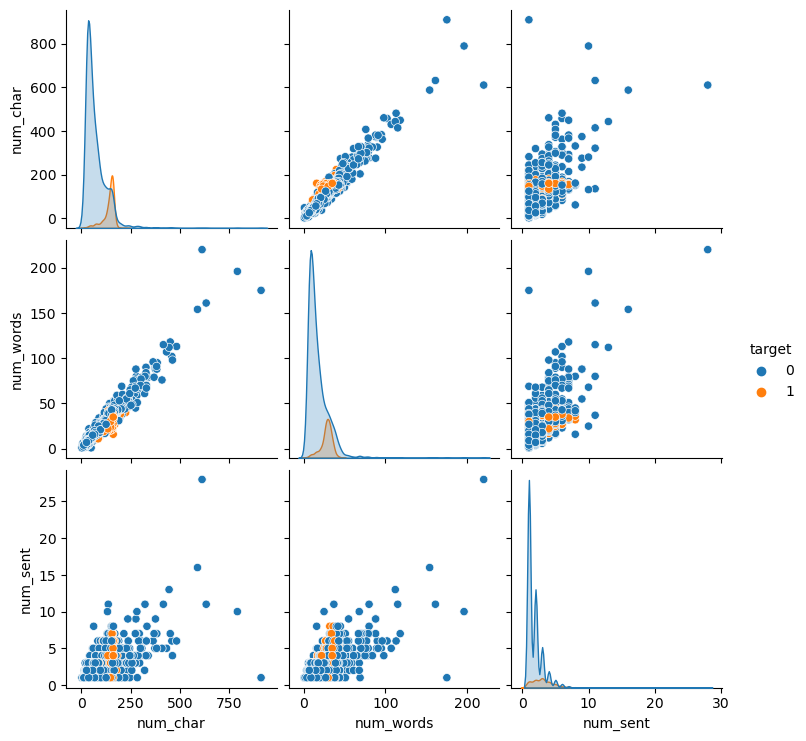

In [98]:
sns.pairplot(df,hue='target')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16136\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

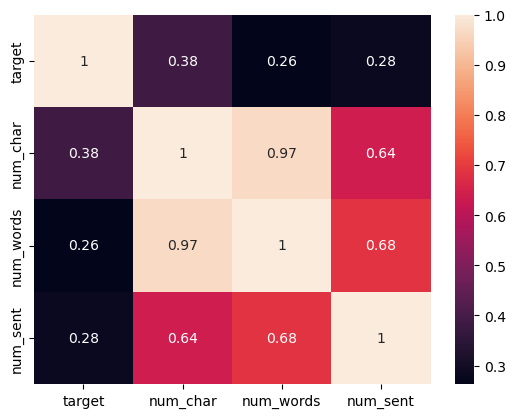

In [100]:
sns.heatmap(df.corr(),annot=True)

# 3.Data Preprocessing

In [117]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [120]:
def trans_text(txt):
    txt = txt.lower()
    txt = nltk.word_tokenize(txt)
    y=[]
    for i in txt:
        if i.isalnum():
            y.append(i)
    txt = y[:]
    y.clear()
    for i in txt:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    txt = y[:]
    y.clear()
    for i in txt:
        y.append(ps.stem(i))
    return " ".join(y)

In [124]:
trans_text(df['text'][10]), df['text'][10]

('gon na home soon want talk stuff anymor tonight k cri enough today',
 "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

In [126]:
df['transformed_txt'] = df['text'].apply(trans_text)
df.sample(5)

,target,text,num_char,num_words,num_sent,transformed_txt
5451,0,Just sing HU. I think its also important to fi...,251,48,4,sing hu think also import find someon femal kn...
5370,1,dating:i have had two of these. Only started a...,139,31,3,date two start sent text talk sport radio last...
4268,0,Beauty sleep can help ur pimples too.,37,8,1,beauti sleep help ur pimpl
3480,0,Wherre's my boytoy ? :-(,24,8,2,wherr boytoy
2986,0,"I'm there and I can see you, but you can't see...",96,26,3,see ca see mayb reboot ym seen buzz


In [140]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

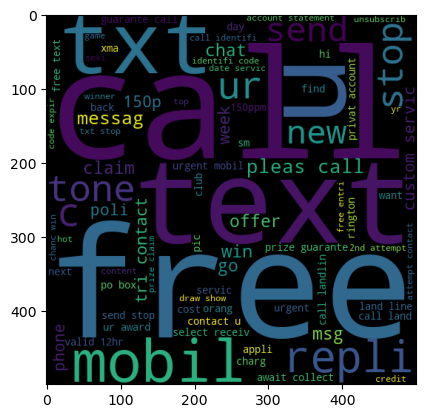

In [141]:
spam_wc = wc.generate(df[df['target']==1]['transformed_txt'].str.cat(sep=" "))
plt.imshow(spam_wc)

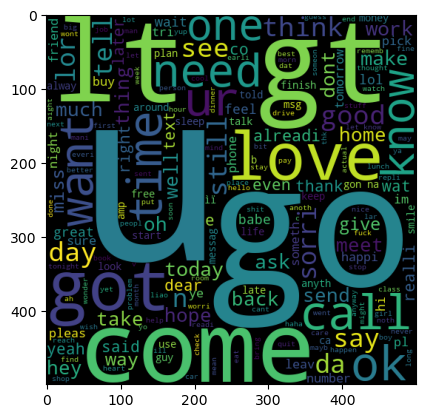

In [142]:
ham_wc = wc.generate(df[df['target']==0]['transformed_txt'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [153]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_txt'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus=[]
for msg in df[df['target']==0]['transformed_txt'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

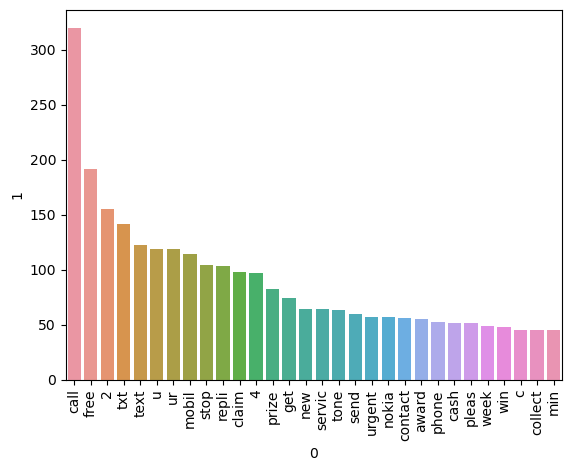

In [156]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


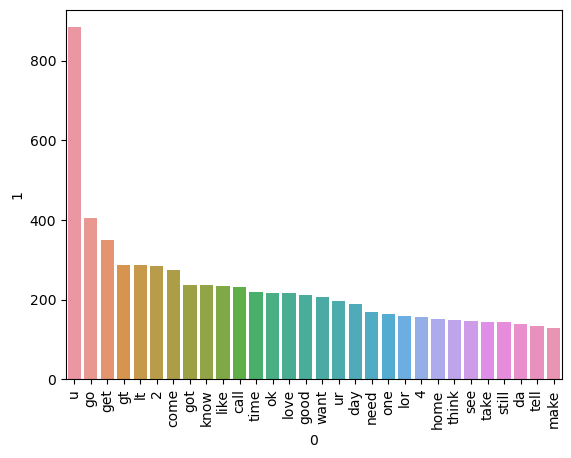

In [155]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4.Model Building

In [195]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [196]:
X = tfidf.fit_transform(df['transformed_txt']).toarray()
X.shape

(5169, 3000)

In [197]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [200]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [201]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb =BernoulliNB()

In [202]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
 

0.8607350096711799
[[787 125]
 [ 19 103]]
0.4517543859649123


In [203]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
 

0.9777562862669246
[[912   0]
 [ 23  99]]
1.0


In [204]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[910   2]
 [ 15 107]]
0.981651376146789


# tfidf -> MNB

# trying various other classifiers

In [205]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier

In [206]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [207]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt
# }

In [208]:
# accuracy_scores = []
# precision_scores = []

# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)
    
#     return accuracy,precision
# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.9904761904761905
For  KN
Accuracy -  0.9303675048355899
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  1.0
For  DT
Accuracy -  0.9506769825918762
Precision -  0.8256880733944955
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9368421052631579
For  RF
Accuracy -  0.97678916827853
Precision -  0.9711538461538461
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.897196261682243
For  BgC
Accuracy -  0.9700193423597679
Precision -  0.8527131782945736
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9626168224299065
For  GBDT
Accuracy -  0.9622823984526112
Precision -  0.946236559139785


In [209]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
# performance_df

,Algorithm,Accuracy,Precision
1,KN,0.930368,1.000000
2,NB,0.977756,1.000000
0,SVC,0.981625,0.990476
5,RF,0.976789,0.971154
8,ETC,0.977756,0.962617
9,GBDT,0.962282,0.946237
4,LR,0.962282,0.936842
6,AdaBoost,0.964217,0.897196
7,BgC,0.970019,0.852713
3,DT,0.950677,0.825688


In [210]:
import pickle as pkl
pkl.dump(tfidf,open('vectorizer.pkl','wb'))
pkl.dump(mnb,open('model.pkl','wb'))